In [21]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.simplefilter("ignore")


In [3]:
data = pd.read_csv('loan_prediction.csv')
pd.set_option('display.max_columns', None)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

In [18]:
data.isna().mean(axis=0)  

# since all have data more than 40%, can't drop any column

Loan_ID              0.000000
Gender               0.000000
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

__Handling the categorical Variables and their missing values__

GENDER

In [9]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Gender'].isnull().sum()

13

In [12]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [13]:
data['Gender'].isnull().sum()

0

In [22]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Gender_cat'] = labelencoder.fit_transform(data['Gender'])
data.drop(['Gender'],axis=1,inplace=True)
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_cat
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [14]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Married'].isnull().sum()

3

In [19]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [23]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Married_cat'] = labelencoder.fit_transform(data['Married'])
data.drop(['Married'],axis=1,inplace=True)
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_cat,Married_cat
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1


In [24]:
data['Education'].unique()


array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
change = {'Graduate':1, 'Not Graduate':0}
data['Education'] = data["Education"].apply(lambda x: change[x])
data.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_cat,Married_cat
0,LP001002,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


In [28]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
data['Self_Employed'].isnull().sum()

32

In [30]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [32]:
change = {'Yes':1, 'No':0}
data['Self_Employed'] = data["Self_Employed"].apply(lambda x: change[x])
data.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_cat,Married_cat
0,LP001002,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0


In [33]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Property_Area_cat'] = labelencoder.fit_transform(data['Property_Area'])
data.drop(['Property_Area'],axis=1,inplace=True)
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_cat,Married_cat,Property_Area_cat
0,LP001002,0,1,0,5849,0.0,NaN,360.0,1.0,Y,1,0,2
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,N,1,1,0
2,LP001005,0,1,1,3000,0.0,66.0,360.0,1.0,Y,1,1,2
3,LP001006,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,2
4,LP001008,0,1,0,6000,0.0,141.0,360.0,1.0,Y,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0
610,LP002979,3+,1,0,4106,0.0,40.0,180.0,1.0,Y,1,1,0
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,Y,1,1,2
612,LP002984,2,1,0,7583,0.0,187.0,360.0,1.0,Y,1,1,2


In [45]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['Gender_cat', 'Married_cat', 'Property_Area_cat'], int64: ['Education', 'Self_Employed', 'ApplicantIncome', 'Loan_Status'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Dependents']}

In [46]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [47]:
data['Dependents'].isnull().sum()

15

In [48]:
data['Dependents'] = data['Dependents'].fillna('0')

In [49]:
data['Dependents'].isnull().sum()

0

In [50]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Dependents_cat'] = labelencoder.fit_transform(data['Dependents'])
data.drop(['Dependents'],axis=1,inplace=True)
data

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_cat,Married_cat,Property_Area_cat,Dependents_cat
0,1,0,5849,0.0,NaN,360.0,1.0,1,1,0,2,0
1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1
2,1,1,3000,0.0,66.0,360.0,1.0,1,1,1,2,0
3,0,0,2583,2358.0,120.0,360.0,1.0,1,1,1,2,0
4,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0
610,1,0,4106,0.0,40.0,180.0,1.0,1,1,1,0,3
611,1,0,8072,240.0,253.0,360.0,1.0,1,1,1,2,1
612,1,0,7583,0.0,187.0,360.0,1.0,1,1,1,2,2


Text(0, 0.5, 'Count')

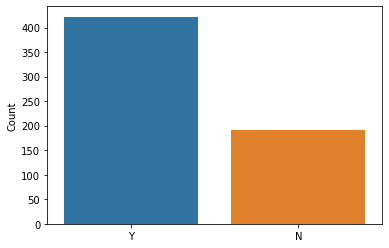

In [36]:
sns.barplot(x=data['Loan_Status'].value_counts().index,y=data['Loan_Status'].value_counts())
plt.ylabel('Count')

Text(0, 0.5, 'Count')

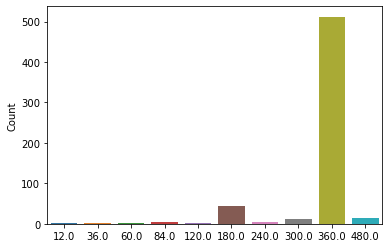

In [39]:
sns.barplot(x=data['Loan_Amount_Term'].value_counts().index,y=data['Loan_Amount_Term'].value_counts())
plt.ylabel('Count')


# more people have asked for loan of 2 years

In [40]:
data.drop(['Loan_ID'], inplace=True, axis=1)
data

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_cat,Married_cat,Property_Area_cat
0,0,1,0,5849,0.0,NaN,360.0,1.0,Y,1,0,2
1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,1,1,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,Y,1,1,2
3,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,2
4,0,1,0,6000,0.0,141.0,360.0,1.0,Y,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0
610,3+,1,0,4106,0.0,40.0,180.0,1.0,Y,1,1,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,Y,1,1,2
612,2,1,0,7583,0.0,187.0,360.0,1.0,Y,1,1,2


__Encoding the Target Variable__

In [41]:
change = {'Y':1, 'N':0}
data['Loan_Status'] = data["Loan_Status"].apply(lambda x: change[x])
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_cat,Married_cat,Property_Area_cat
0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1,0,2
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,1,2
3,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,1,2
4,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,2


__Filling NAN is NUMERICAL DATA__

In [53]:
data.isna().sum()

Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Gender_cat            0
Married_cat           0
Property_Area_cat     0
Dependents_cat        0
dtype: int64

In [54]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [55]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [56]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [57]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [58]:
data.isna().sum()

Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Gender_cat           0
Married_cat          0
Property_Area_cat    0
Dependents_cat       0
dtype: int64

__Our data is good to go__

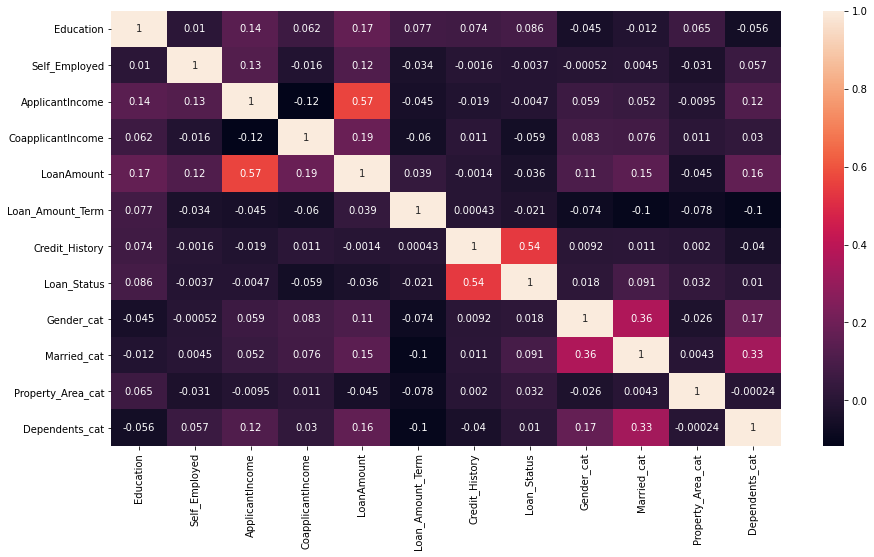

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

__Splitting the data into x and y__

In [62]:
# Now Dataset is ready for use
# Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [63]:
x=data.drop('Loan_Status',axis=1)
x

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_cat,Married_cat,Property_Area_cat,Dependents_cat
0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,2,0
1,1,0,4583,1508.0,128.000000,360.0,1.0,1,1,0,1
2,1,1,3000,0.0,66.000000,360.0,1.0,1,1,2,0
3,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,2,0
4,1,0,6000,0.0,141.000000,360.0,1.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0
610,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0,3
611,1,0,8072,240.0,253.000000,360.0,1.0,1,1,2,1
612,1,0,7583,0.0,187.000000,360.0,1.0,1,1,2,2


In [65]:
y= data['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

__Logistic Regression__

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

In [67]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,4)==round(accuracy_score(y_test,pred_test)*100,4):
        print("Best suitable Random state is: ",i)
        print("training Accuracy is: ",accuracy_score(y_train,pred_train)*100)
        print("testing accuracy is: ",accuracy_score(y_test,pred_test)*100)

As no state found, we take any random state.

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=.020)

In [69]:
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
lr.score(x_test,y_test)

0.6923076923076923

__Decision Tree__

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
dt.score(x_test,y_test)

0.6153846153846154

In [77]:
grid_param={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random']}

In [78]:
grid_search=GridSearchCV(dt,grid_param,cv=5)

In [79]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [80]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 13, 'splitter': 'random'}


In [81]:
dtn= DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=12,min_samples_split=13,splitter='random')

In [82]:
dtn.fit(x_train,y_train)
dtn.score(x_test,y_test)

0.6923076923076923

__Random Forest__

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [84]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
rf.score(x_test,y_test)

0.6923076923076923

In [86]:
param_grid ={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'n_estimators':[100,200,300]
}


In [87]:
grid_searchrf = GridSearchCV(rf,param_grid=param_grid,cv=4)

In [88]:
grid_searchrf.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100, 200, 300]})

In [89]:
best_param= grid_searchrf.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [90]:
rfn=RandomForestClassifier(criterion='entropy',max_depth=8,min_samples_leaf=1,min_samples_split=5, n_estimators=100)
rfn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5)

In [91]:
rfn.score(x_test,y_test)

0.6923076923076923

Both give the same result, saving RF

In [92]:
import pickle
# Writing different model files to file
with open( 'LoanPrediction.sav', 'wb') as f:
    pickle.dump(rfn,f)